In [445]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [446]:
def remove_punct(df):
    """
    Parameters:
        df (dataframe): dataframe containing text for cleaning
    Returns:
        dataframe
    """
    cols = df.columns
    for col in cols:
        try:
            if df[col].dtype == "O":
                df.loc[:, col] = df[col].str.replace(r"[^\w\s]", "", regex=True)
        except AttributeError as e:
            print(f"Check for non-string datatypes: {e}")


def lowercase(df):
    """
    Parameters:
        df (dataframe): dataframe containing text for cleaning
    Returns:
        dataframe
    """
    cols = df.columns
    for col in cols:
        try:
            if df[col].dtype == "O":
                df.loc[:, col] = df[col].str.lower()
        except AttributeError as e:
            print(f"Check for non-string datatypes: {e}")

def convert_datetime(df, columns=[], format='%m/%d/%y', errors="raise"):
    """
    """
    for col in columns:
        df.loc[:, col] = pd.to_datetime(df[col], format=format, errors=errors)

In [447]:
# Read in data
recalls_headers = pd.read_csv("./data/RCL_headers.txt")
recalls_head = recalls_headers.values.tolist()
rcl_headers = [head for sublist in recalls_head for head in sublist]

In [448]:
recalls = pd.read_csv(
    "./data/FLAT_RCL.txt", sep="\t", names=rcl_headers, on_bad_lines="warn"
)

Skipping line 188394: expected 27 fields, saw 34

/var/folders/4x/y38ttwq12519_qtj737r25vh0000gn/T/ipykernel_20314/2009543908.py:1: DtypeWarning: Columns (17,18,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  recalls = pd.read_csv(


In [449]:
recalls.sample(2)

,RECORD_ID,CAMPNO,MAKETXT,MODELTXT,YEARTXT,MFGCAMPNO,COMPNAME,MFGNAME,BGMAN,ENDMAN,...,RPNO,FMVSS,DESC_DEFECT,CONEQUENCE_DEFECT,CORRECTIVE_ACTION,NOTES,RCL_CMPT_ID,MFR_COMP_NAME,MFR_COMP_DESC,MFR_COMP_PTNO
59330,59331,06E022000,CHRYSLER,TOWN AND COUNTRY,2003,NaN,"SERVICE BRAKES, HYDRAULIC","BRAKE PARTS, INC.",NaN,NaN,...,NaN,NaN,CERTAIN AFTERMARKET BRAKE HYDRAULIC MASTER CYL...,LOSS OF BRAKE FLUID CAN LEAD TO A DECREASE IN ...,"AFFINIA (BRAKE PARTS, INC.) WILL REPLACE THE S...","THIS RECALL ONLY PERTAINS TO AFTERMARKET NAPA,...",000022604000103559000000062,NaN,NaN,NaN
86173,86174,10E019000,NISSAN,XTERRA,2005,NaN,SUSPENSION:FRONT:CONTROL ARM:LOWER ARM,"NISSAN NORTH AMERICA, INC.",NaN,NaN,...,NaN,NaN,NISSAN IS RECALLING CERTAIN FRONT AND REAR LOW...,"IF THE COLLAR WELD SEPARATES, THE VEHICLE HAND...",NISSAN WILL NOTIFY OWNERS AND DEALERS WILL REP...,OWNERS MAY ALSO CONTACT THE NATIONAL HIGHWAY T...,000035884000208850000000040,NaN,NaN,NaN


In [450]:
recalls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248841 entries, 0 to 248840
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   RECORD_ID          248841 non-null  int64  
 1   CAMPNO             248841 non-null  object 
 2   MAKETXT            248841 non-null  object 
 3   MODELTXT           248841 non-null  object 
 4   YEARTXT            248841 non-null  int64  
 5   MFGCAMPNO          150692 non-null  object 
 6   COMPNAME           248841 non-null  object 
 7   MFGNAME            248836 non-null  object 
 8   BGMAN              115289 non-null  float64
 9   ENDMAN             115533 non-null  float64
 10  RCLTYPECD          248841 non-null  object 
 11  POTAFF             248555 non-null  float64
 12  ODATE              236645 non-null  float64
 13  INFLUENCED_BY      248841 non-null  object 
 14  MFGTXT             248841 non-null  object 
 15  RCDATE             248841 non-null  int64  
 16  DA

In [451]:
# Number of recall campaigns
len(recalls["CAMPNO"].unique())

27436

In [452]:
# Number of unique components recalled
len(recalls["RCL_CMPT_ID"].unique())

176081

In [453]:
# Filter to columns of interest
select_features = [
    "RECORD_ID",
    "CAMPNO",
    "MAKETXT",
    "MODELTXT",
    "YEARTXT",
    "RCLTYPECD",
    "RCDATE",
    "DATEA",
    "MFGNAME",
    "COMPNAME",
    "POTAFF",
    "RCL_CMPT_ID",
]
filtered_recalls = recalls[select_features]
filtered_recalls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248841 entries, 0 to 248840
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   RECORD_ID    248841 non-null  int64  
 1   CAMPNO       248841 non-null  object 
 2   MAKETXT      248841 non-null  object 
 3   MODELTXT     248841 non-null  object 
 4   YEARTXT      248841 non-null  int64  
 5   RCLTYPECD    248841 non-null  object 
 6   RCDATE       248841 non-null  int64  
 7   DATEA        248841 non-null  int64  
 8   MFGNAME      248836 non-null  object 
 9   COMPNAME     248841 non-null  object 
 10  POTAFF       248555 non-null  float64
 11  RCL_CMPT_ID  248841 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 22.8+ MB


In [454]:
filtered_recalls["MFGNAME"].value_counts(ascending=False)[:20]

MFGNAME
Mercedes-Benz USA, LLC                      39838
Ford Motor Company                           8038
Honda (American Honda Motor Co.)             6316
GENERAL MOTORS CORP.                         6232
FORD MOTOR COMPANY                           4741
Forest River, Inc.                           3980
Daimler Trucks North America LLC             3735
Daimler Trucks North America, LLC            3197
Toyota Motor Engineering & Manufacturing     3181
BMW of North America, LLC                    3159
Volkswagen Group of America, Inc.            3156
Jaguar Land Rover North America, LLC         2986
PACCAR Incorporated                          2974
Nissan North America, Inc.                   2816
CHRYSLER CORPORATION                         2804
General Motors LLC                           2343
Prevost Car (US) Inc.                        2270
Daimler Vans USA, LLC                        2261
MACK TRUCKS, INCORPORATED                    1988
Mercedes-Benz USA, LLC.                   

In [455]:
company_counts = pd.DataFrame(filtered_recalls["MFGNAME"].value_counts(ascending=False)[:50]).reset_index()
company_counts


,MFGNAME,count
0,"Mercedes-Benz USA, LLC",39838
1,Ford Motor Company,8038
2,Honda (American Honda Motor Co.),6316
3,GENERAL MOTORS CORP.,6232
4,FORD MOTOR COMPANY,4741
5,"Forest River, Inc.",3980
6,Daimler Trucks North America LLC,3735
7,"Daimler Trucks North America, LLC",3197
8,Toyota Motor Engineering & Manufacturing,3181
9,"BMW of North America, LLC",3159


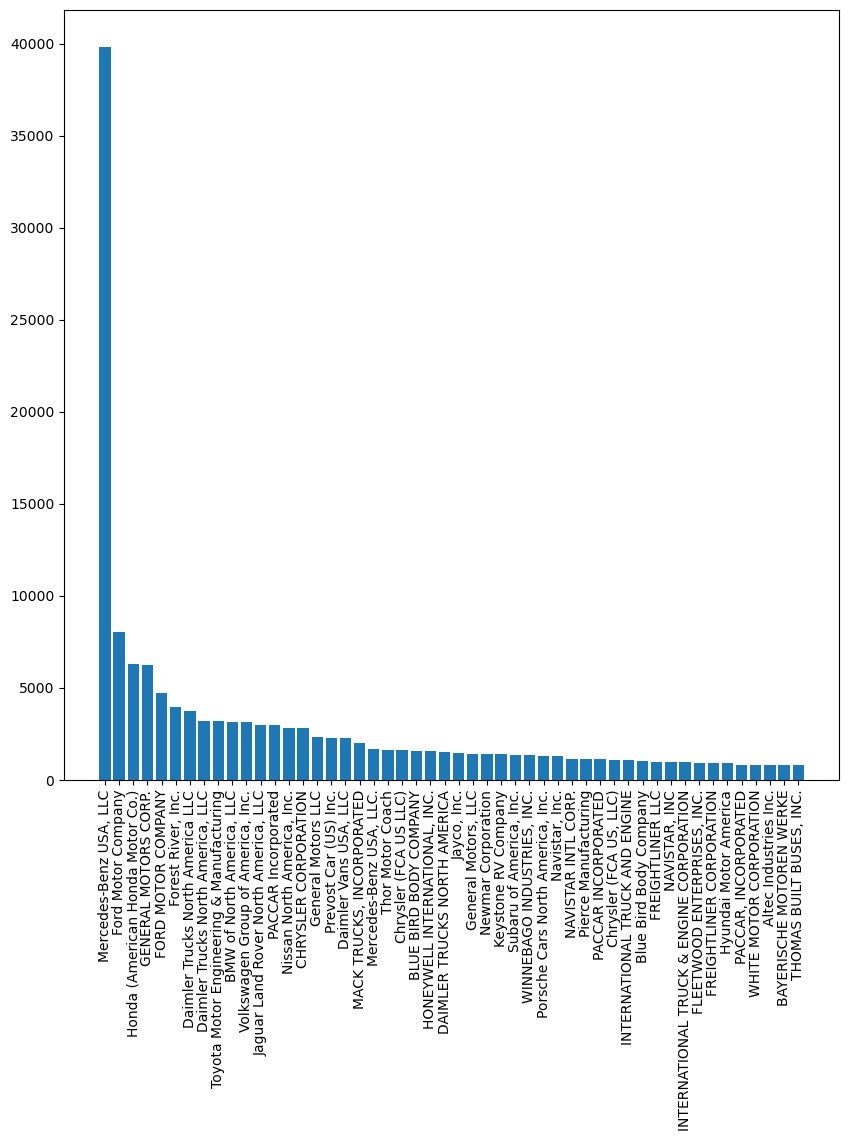

In [456]:
plt.figure(figsize=(10, 10))
plt.bar(company_counts["MFGNAME"], company_counts["count"])
plt.xticks(rotation=90)
plt.show()

In [457]:
# Examine missing time entry before conversion to datetime
filtered_recalls.iloc[36, :]

RECORD_ID                                  37
CAMPNO                              02E052000
MAKETXT                                   EMC
MODELTXT                              EGB-IIF
YEARTXT                                  9999
RCLTYPECD                                   E
RCDATE                               20020904
DATEA                                20020912
MFGNAME          ELECTRONIC MOBILITY CONTROLS
COMPNAME       VEHICLE SPEED CONTROL:LINKAGES
POTAFF                                 1823.0
RCL_CMPT_ID       000015202000106304000000296
Name: 36, dtype: object

In [458]:
# Clean data
lowercase(filtered_recalls)
remove_punct(filtered_recalls)

date_cols = ["RCDATE", "DATEA"]
convert_datetime(filtered_recalls, columns=date_cols, format="%Y%m%d")
convert_datetime(filtered_recalls, columns=["YEARTXT"], format='%Y', errors="coerce")
filtered_recalls.sample(5)

,RECORD_ID,CAMPNO,MAKETXT,MODELTXT,YEARTXT,RCLTYPECD,RCDATE,DATEA,MFGNAME,COMPNAME,POTAFF,RCL_CMPT_ID
10361,10362,99v235000,volvo,s70,1998-01-01,v,1999-08-30,1999-08-30,volvo cars of na inc,exterior lightingheadlightsswitch,139588.0,000009473000203028000000219
243559,243563,23v095000,electrameccanica,solo g3,2022-01-01,v,2023-02-16,2023-02-17,electra meccanica vehicles corp,electrical systempropulsion systemtraction bat...,429.0,000124776005563917000001777
97598,97599,13v283000,ram,cv tradesman,2013-01-01,v,2013-07-02,2013-07-05,chrysler group llc,air bags,224264.0,000054484001883970000000256
149150,149151,20v107000,smart,fortwo,2019-01-01,v,2020-02-24,2020-02-25,mercedesbenz usa llc,electrical systempropulsion systemtraction bat...,1.0,000101993004229455000001305
3162,3163,01v357000,nissan,sentra,2000-01-01,v,2001-11-16,2001-11-30,nissan north america inc,engine and engine coolingenginegasoline,103000.0,000014616000201623000000129


In [459]:
missing_yeartxt = filtered_recalls.query("YEARTXT.isna()")
len(missing_yeartxt)

10090

In [460]:
filtered_recalls.head()

,RECORD_ID,CAMPNO,MAKETXT,MODELTXT,YEARTXT,RCLTYPECD,RCDATE,DATEA,MFGNAME,COMPNAME,POTAFF,RCL_CMPT_ID
0,1,02v288000,ford,focus,2000-01-01,v,2002-11-06,2002-11-06,ford motor company,electrical system12v24v48v batterycables,291854.0,000015339000215021000000202
1,2,02v288000,ford,focus,2001-01-01,v,2002-11-06,2002-11-06,ford motor company,electrical system12v24v48v batterycables,291854.0,000015339000215022000000202
2,3,02v236000,jayco,ft eagle 10 sg,2003-01-01,v,2002-09-04,2002-09-12,jayco inc,equipmentotherlabels,86.0,000015210000106403000000349
3,4,02v237000,holiday rambler,endeavor,2000-01-01,v,2002-09-09,2002-09-12,monaco coach corp,structure,6223.0,000015211000083965000000272
4,5,02v237000,holiday rambler,endeavor,1999-01-01,v,2002-09-09,2002-09-12,monaco coach corp,structure,6223.0,000015211000080938000000272


In [484]:
print(f"Latest RCDATE: {max(filtered_recalls['RCDATE'])}")
print(f"Earliest RCDATE: {min(filtered_recalls['RCDATE'])}")

Latest RCDATE: 2023-11-09 00:00:00
Earliest RCDATE: 1966-01-19 00:00:00


In [461]:
# Top 50 Appearances of Manufacturers
pd.DataFrame(filtered_recalls["MFGNAME"].value_counts(ascending=False)[:50]).reset_index()

,MFGNAME,count
0,mercedesbenz usa llc,41784
1,ford motor company,12779
2,daimler trucks north america llc,6932
3,honda american honda motor co,6678
4,general motors corp,6232
5,paccar incorporated,4920
6,forest river inc,4637
7,general motors llc,3830
8,nissan north america inc,3593
9,bmw of north america llc,3550


In [478]:
companies = [
    "ford motor company",
    "general motors LLC",
    "general motors corp",
    "tesla inc",
    "hyundai motor america",
    "toyota motor corporation",
    "toyota motor north america inc",
    "TOYOTA MOTOR NORTH AMERICA, INC",
    "honda american honda motor co",
]
filtered_recalls = filtered_recalls[filtered_recalls["MFGNAME"].isin(companies)]
company_recalls_counts = filtered_recalls.groupby("CAMPNO")["MFGNAME"].agg(lambda x: "".join(set(x))).reset_index()
company_recalls_counts

,CAMPNO,MFGNAME
0,00e013000,ford motor company
1,00e043000,general motors corp
2,00v020000,ford motor company
3,00v021000,general motors corp
4,00v044000,general motors corp
...,...,...
3247,99v348000,general motors corp
3248,99v355000,general motors corp
3249,99v356000,general motors corp
3250,99v357000,general motors corp


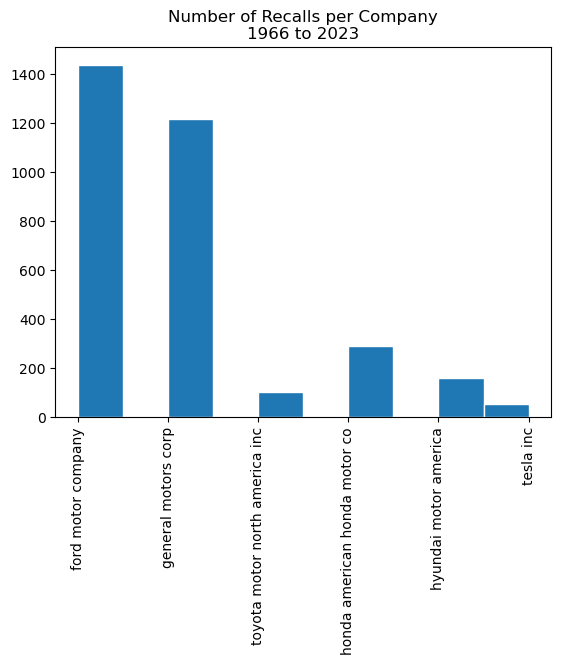

In [498]:
plt.hist(x=company_recalls_counts["MFGNAME"], edgecolor="white")
plt.xticks(rotation=90)
plt.title("Number of Recalls per Company\n1966 to 2023")
plt.show()

In [464]:
# Select manufacturers of interest (e.g. Honda)
# Select one recall for each
# Identify date of recall
# Look back 12 months based on date complaint received
# Grab consumer complaint data within that 12 month window matched on manufacturer (maybe match to model makes and years)
# Output: Complaints for manufacturers of interest within daterange
# Q: How to chunk the complaints to work with LLM? Bin by weeks or months?